In [1]:
import pandas as pd

In [15]:
movie=pd.read_csv(r"C:\Users\lokes\Downloads\movies.csv")

In [16]:
movie.shape

(9742, 3)

In [17]:
rating=pd.read_csv(r"C:\Users\lokes\Downloads\ratings.csv")

In [18]:
rating.shape

(100836, 4)

In [19]:
rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [20]:
urs_id=rating['userId'].nunique()
urs_id

610

In [22]:
most_rated_movie_id = rating['movieId'].value_counts().idxmax()
most_rated_movie_id

356

In [24]:
most_rated_movie_title = movie[movie['movieId'] == most_rated_movie_id]['title'].values[0]


In [25]:
most_rated_movie_title

'Forrest Gump (1994)'

In [26]:
tags=pd.read_csv(r"C:\Users\lokes\Downloads\tags.csv")
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [28]:
matrix_movie_id = movie[movie['title'] == 'Matrix, The (1999)']['movieId'].values[0]
matrix_tags = tags[tags['movieId'] == matrix_movie_id]['tag'].unique()
matrix_tags

array(['martial arts', 'sci-fi', 'alternate universe', 'philosophy',
       'post apocalyptic'], dtype=object)

In [29]:
ratings=pd.read_csv(r"C:\Users\lokes\Downloads\ratings.csv")
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [30]:
terminator_movie_id = movie[movie['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]
terminator_ratings = ratings[ratings['movieId'] == terminator_movie_id]['rating']
average_rating = terminator_ratings.mean()
average_rating

3.970982142857143

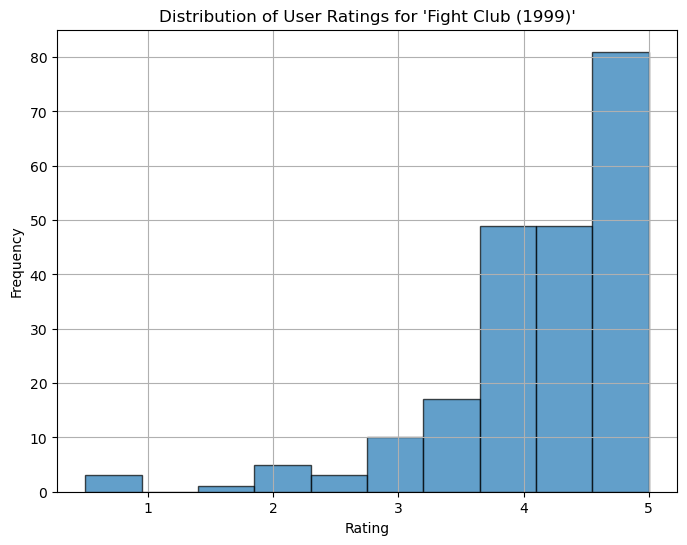

In [32]:
import matplotlib.pyplot as plt
fight_club_movie_id = movie[movie['title'] == 'Fight Club (1999)']['movieId'].values[0]
fight_club_ratings = ratings[ratings['movieId'] == fight_club_movie_id]['rating']
plt.figure(figsize=(8, 6))
plt.hist(fight_club_ratings, bins=10, edgecolor='black', alpha=0.7)
plt.title("Distribution of User Ratings for 'Fight Club (1999)'")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [33]:
grouped_ratings = ratings.groupby('movieId').agg(
    count_ratings=('rating', 'count'),
    mean_rating=('rating', 'mean')
).reset_index()
merged_df = pd.merge(movie, grouped_ratings, on='movieId', how='inner')
filtered_df = merged_df[merged_df['count_ratings'] > 50]
most_popular_movie = filtered_df.loc[filtered_df['mean_rating'].idxmax()]
most_popular_movie

movieId                                       318
title            Shawshank Redemption, The (1994)
genres                                Crime|Drama
count_ratings                                 317
mean_rating                              4.429022
Name: 277, dtype: object

In [34]:
grouped_ratings = ratings.groupby('movieId').agg(
    count_ratings=('rating', 'count'),
    mean_rating=('rating', 'mean')
).reset_index()
merged_df = pd.merge(movie, grouped_ratings, on='movieId', how='inner')
filtered_df = merged_df[merged_df['count_ratings'] > 50]
top_5_movies = filtered_df.sort_values(by='count_ratings', ascending=False).head(5)
print(top_5_movies[['title', 'count_ratings']])

,movieId,title,genres,count_ratings,mean_rating
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


In [35]:
grouped_ratings = ratings.groupby('movieId').agg(
    count_ratings=('rating', 'count'),
    mean_rating=('rating', 'mean')
).reset_index()
merged_df = pd.merge(movie, grouped_ratings, on='movieId', how='inner')
filtered_df = merged_df[merged_df['count_ratings'] > 50]
sci_fi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi', case=False, na=False)]
sci_fi_movies_sorted = sci_fi_movies.sort_values(by='count_ratings', ascending=False)
third_most_popular_sci_fi_movie = sci_fi_movies_sorted.iloc[2]
print(f"The third most popular Sci-Fi movie based on user ratings is: {third_most_popular_sci_fi_movie['title']}")


The third most popular Sci-Fi movie based on user ratings is: Jurassic Park (1993)


In [39]:
from imdb import IMDb
links = pd.read_csv(r"C:\Users\lokes\Downloads\links.csv")
ia = IMDb()

def get_imdb_rating(imdb_id):
    try:
        movie = ia.get_movie(imdb_id)
        return movie.get('rating')
    except Exception as e:
        return None
merged_df = pd.merge(movie, links, on='movieId')

merged_df['imdbRating'] = merged_df['imdbId'].apply(lambda x: get_imdb_rating(int(x)) if pd.notnull(x) else None)
highest_rated_movie = merged_df.loc[merged_df['imdbRating'].idxmax()]

print(f"MovieId: {highest_rated_movie['movieId']}, Title: {highest_rated_movie['title']}, IMDb Rating: {highest_rated_movie['imdbRating']}")


KeyboardInterrupt: 

In [37]:
pip install IMDbPY

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Obtaining dependency information for IMDbPY from https://files.pythonhosted.org/packages/6f/3c/38555ae0ae26487eff082065a1f7b7a490f7f6e13ea249b8e82cfcc6eb31/IMDbPY-2022.7.9-py3-none-any.whl.metadata
  Obtaining dependency information for cinemagoer from https://files.pythonhosted.org/packages/a7/cc/959c7d74b7d6124852fc4741c154c8f50848f47360955f780636102ec711/cinemagoer-2023.5.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/297.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/297.2 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/297.2 kB 325.1 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/297.2 kB 326.8 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/297.2 kB 363.1 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/297.2 kB 459.5 kB

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
def get_imdb_rating(imdb_id):
    try:
        movie = ia.get_movie(imdb_id)
        return movie.get('rating')
    except Exception as e:
        return None
merged_df = pd.merge(movie, links, on='movieId')
sci_fi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi', case=False, na=False)]
sci_fi_movies['imdbRating'] = sci_fi_movies['imdbId'].apply(lambda x: get_imdb_rating(int(x)) if pd.notnull(x) else None)
highest_rated_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['imdbRating'].idxmax()]

print(f"MovieId: {highest_rated_sci_fi_movie['movieId']}, Title: {highest_rated_sci_fi_movie['title']}, IMDb Rating: {highest_rated_sci_fi_movie['imdbRating']}")

2024-08-31 14:25:43,228 CRITICAL [imdbpy] C:\Users\lokes\AppData\Roaming\Python\Python311\site-packages\imdb\_exceptions.py:32: IMDbDataAccessError exception raised; args: ({'errcode': None, 'errmsg': 'None', 'url': 'https://www.imdb.com/title/tt0185183/reference', 'proxy': '', 'exception type': 'IOError', 'original exception': URLError(gaierror(11004, 'getaddrinfo failed'))},); kwds: {}
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\urllib\request.py", line 1348, in do_open
    h.request(req.get_method(), req.selector, req.data, headers,
  File "C:\ProgramData\anaconda3\Lib\http\client.py", line 1286, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "C:\ProgramData\anaconda3\Lib\http\client.py", line 1332, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "C:\ProgramData\anaconda3\Lib\http\client.py", line 1281, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  